In [1]:
path = "D:/DeepLearning/datasets/HandSign/"

In [2]:
import pandas as pd
import numpy as np
import h5py

In [6]:
def load_dataset():
    train_dataset = h5py.File(path+'data/train_signs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File(path+'data/test_signs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    #classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig,test_set_x_orig,test_set_y_orig

In [30]:
train_x, train_y, test_x, test_y = load_dataset()

In [34]:
np.unique(train_y)

array([0, 1, 2, 3, 4, 5], dtype=int64)

4


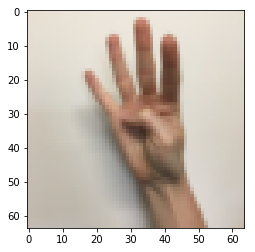

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
print(train_y[0,43])
plt.imshow(train_x[43])

#### Shapes of input Files

In [36]:
print("Train X:", train_x.shape)
print("Train Y:", train_y.shape)
print("Test X:", test_x.shape)
print("Test Y:", test_y.shape)

Train X: (1080, 64, 64, 3)
Train Y: (1, 1080)
Test X: (120, 64, 64, 3)
Test Y: (1, 120)


#### Data needs to be reshaped and normalized before runnning any CNN for classification

In [37]:
train_y = train_y.reshape(train_y.shape[1])
test_y = test_y.reshape(test_y.shape[1])

#### Keras: Channel last - Images already in the format

In [38]:
#COnverting Y values to one hot encoding
from keras.utils import np_utils

In [39]:
train_y = np_utils.to_categorical(train_y)
test_y = np_utils.to_categorical(test_y)

In [40]:
#### Normalize inputs and convert to Float
train_x = train_x.astype('Float32')
test_x = test_x.astype('Float32')
train_x/=255
test_x/=255

C:\Users\Ashutosh\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:2: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  from ipykernel import kernelapp as app
C:\Users\Ashutosh\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:3: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  app.launch_new_instance()


#### Build Convolutional Neural Network

In [47]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
import keras


In [84]:
## Model Parameters
batch_size=16
epochs=50
input_shape = (64,64,3)

In [45]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu',input_shape=input_shape))
model.add(Conv2D(64,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='softmax'))


In [48]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = keras.optimizers.adam(), metrics = ['accuracy'])

In [49]:
#Fit Model
model.fit(train_x,train_y, batch_size=batch_size, epochs = epochs,
          verbose=1, validation_data = (test_x, test_y))

#Score Model
score = model.evaluate(test_x, test_y, verbose=0)

print("Test Loss:", score[0])
print("Test Accuracy", score[1])

Train on 1080 samples, validate on 120 samples
Epoch 1/10
1080/1080 [==============================] - 4s - loss: 1.8415 - acc: 0.3519 - val_loss: 1.2717 - val_acc: 0.5917
Epoch 2/10
1080/1080 [==============================] - 1s - loss: 1.0641 - acc: 0.6259 - val_loss: 0.9795 - val_acc: 0.6917
Epoch 3/10
1080/1080 [==============================] - 1s - loss: 0.6289 - acc: 0.7870 - val_loss: 0.7610 - val_acc: 0.7250
Epoch 4/10
1080/1080 [==============================] - 1s - loss: 0.4368 - acc: 0.8667 - val_loss: 0.5260 - val_acc: 0.8333
Epoch 5/10
1080/1080 [==============================] - 1s - loss: 0.2430 - acc: 0.9296 - val_loss: 0.5386 - val_acc: 0.8417
Epoch 6/10
1080/1080 [==============================] - 1s - loss: 0.1458 - acc: 0.9657 - val_loss: 0.3639 - val_acc: 0.8417
Epoch 7/10
1080/1080 [==============================] - 1s - loss: 0.0727 - acc: 0.9861 - val_loss: 0.3944 - val_acc: 0.8500
Epoch 8/10
1080/1080 [==============================] - 1s - loss: 0.0556 - ac

In [61]:
#plt.imshow(test_x[7])
pred = model.predict(test_x)

In [62]:
pred.shape

(120, 6)

In [68]:
out = []
for i in range(pred.shape[0]):
    out.append(np.argmax(pred[i]))

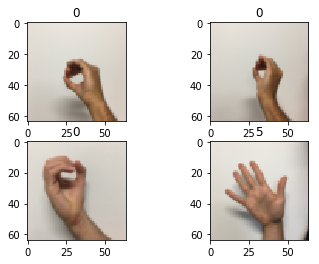

In [79]:
plt.subplots(2,2)
for i in range(0,4):
    plt.subplot(2,2,i+1)
    plt.title(out[i])
    plt.imshow(test_x[i])

#### 89% Accuracy with a basic CNN

### CNN: Deep Network to improve accuracy


In [85]:
#New Model:
from keras.layers import Activation

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=input_shape))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(6))
model.add(Activation('softmax'))

In [86]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = keras.optimizers.adam(), metrics = ['accuracy'])

In [87]:
#Fit Model
model.fit(train_x,train_y, batch_size=batch_size, epochs = epochs,
          verbose=1, validation_data = (test_x, test_y))

#Score Model
score = model.evaluate(test_x, test_y, verbose=0)

print("Test Loss:", score[0])
print("Test Accuracy", score[1])

Train on 1080 samples, validate on 120 samples
Epoch 1/50
1080/1080 [==============================] - 2s - loss: 1.8159 - acc: 0.1472 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 2/50
1080/1080 [==============================] - 2s - loss: 1.7877 - acc: 0.1889 - val_loss: 1.7817 - val_acc: 0.1667
Epoch 3/50
1080/1080 [==============================] - 2s - loss: 1.4536 - acc: 0.3991 - val_loss: 1.2148 - val_acc: 0.5667
Epoch 4/50
1080/1080 [==============================] - 2s - loss: 1.0156 - acc: 0.6435 - val_loss: 0.8590 - val_acc: 0.7000
Epoch 5/50
1080/1080 [==============================] - 2s - loss: 0.7036 - acc: 0.7556 - val_loss: 0.5890 - val_acc: 0.8000
Epoch 6/50
1080/1080 [==============================] - 2s - loss: 0.5017 - acc: 0.8287 - val_loss: 0.4353 - val_acc: 0.8667
Epoch 7/50
1080/1080 [==============================] - 2s - loss: 0.3611 - acc: 0.8741 - val_loss: 0.3516 - val_acc: 0.8833
Epoch 8/50
1080/1080 [==============================] - 2s - loss: 0.2942 - ac

#### 91% Accuracy with a Deeper Model

## RESNETS

In [90]:
import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
#import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
#from resnets_utils import *
from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline

import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

In [91]:
def identity_block(X, f, filters, stage, block):
    """
    Implementation of the identity block as defined in Figure 3
    
    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    
    Returns:
    X -- output of the identity block, tensor of shape (n_H, n_W, n_C)
    """
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value. You'll need this later to add back to the main path. 
    X_shortcut = X
    
    # First component of main path
    X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', 
               name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)
    
    ### START CODE HERE ###
    
    # Second component of main path (≈3 lines)
    X = Conv2D(filters=F2, kernel_size=(f,f), strides=(1,1), padding='same', 
               name=conv_name_base+'2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base+'2b')(X)
    X = Activation('relu')(X)

    # Third component of main path (≈2 lines)
    X = Conv2D(filters=F3, kernel_size=(1,1), strides=(1,1), padding='valid',
               name=conv_name_base+'2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base+'2c')(X)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    ### END CODE HERE ###
    
    return X

In [93]:

def convolutional_block(X, f, filters, stage, block, s = 2):
    """
    Implementation of the convolutional block as defined in Figure 4
    
    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    s -- Integer, specifying the stride to be used
    
    Returns:
    X -- output of the convolutional block, tensor of shape (n_H, n_W, n_C)
    """
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value
    X_shortcut = X


    ##### MAIN PATH #####
    # First component of main path 
    X = Conv2D(F1, (1, 1), strides = (s,s), name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)
    
    ### START CODE HERE ###

    # Second component of main path (≈3 lines)
    X = Conv2D(filters=F2, kernel_size=(f,f), strides=(1,1), padding='same', 
               name=conv_name_base+'2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base+'2b')(X)
    X = Activation('relu')(X)

    # Third component of main path (≈2 lines)
    X = Conv2D(filters=F3, kernel_size=(1,1), strides=(1,1), padding='valid',
               name=conv_name_base+'2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base+'2c')(X)

    ##### SHORTCUT PATH #### (≈2 lines)
    X_shortcut = Conv2D(filters=F3, kernel_size=(1,1), strides=(s,s), padding='valid',
               name=conv_name_base+'1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base+'1')(X_shortcut)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    ### END CODE HERE ###
    
    return X

In [94]:
def ResNet50(input_shape = (64, 64, 3), classes = 6):
    """
    Implementation of the popular ResNet50 the following architecture:
    CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> CONVBLOCK -> IDBLOCK*2 -> CONVBLOCK -> IDBLOCK*3
    -> CONVBLOCK -> IDBLOCK*5 -> CONVBLOCK -> IDBLOCK*2 -> AVGPOOL -> TOPLAYER

    Arguments:
    input_shape -- shape of the images of the dataset
    classes -- integer, number of classes

    Returns:
    model -- a Model() instance in Keras
    """
    
    # Define the input as a tensor with shape input_shape
    X_input = Input(input_shape)

    
    # Zero-Padding
    X = ZeroPadding2D((3, 3))(X_input)
    
    # Stage 1
    X = Conv2D(64, (7, 7), strides = (2, 2), name = 'conv1', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = 'bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    # Stage 2
    X = convolutional_block(X, f = 3, filters = [64, 64, 256], stage = 2, block='a', s = 1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')

    ### START CODE HERE ###

    # Stage 3 (≈4 lines)
    X = convolutional_block(X, f = 3, filters= [128, 128, 512], stage = 3, block='a', s = 2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    # Stage 4 (≈6 lines)
    X = convolutional_block(X, f = 3, filters= [256, 256, 1024], stage = 4, block='a', s = 2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    # Stage 5 (≈3 lines)
    X = convolutional_block(X, f = 3, filters= [512, 512, 2048], stage = 5, block='a', s = 2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    # AVGPOOL (≈1 line). Use "X = AveragePooling2D(...)(X)"
    X = AveragePooling2D(pool_size=(2,2), name = 'avg_pool')(X)
    
    ### END CODE HERE ###

    # output layer
    X = Flatten()(X)
    X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=0))(X)
    
    
    # Create model
    model = Model(inputs = X_input, outputs = X, name='ResNet50')

    return model

In [95]:
model = ResNet50(input_shape = (64, 64, 3), classes = 6)


In [96]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [99]:
model.fit(train_x, train_y, epochs = 20, batch_size = 128,verbose=1)


Epoch 1/20
1080/1080 [==============================] - 17s - loss: 2.8523 - acc: 0.3046    
Epoch 2/20
1080/1080 [==============================] - 4s - loss: 1.2635 - acc: 0.6000     
Epoch 3/20
1080/1080 [==============================] - 4s - loss: 0.5640 - acc: 0.8269     
Epoch 4/20
1080/1080 [==============================] - 4s - loss: 0.8545 - acc: 0.8111     
Epoch 5/20
1080/1080 [==============================] - 4s - loss: 0.5953 - acc: 0.8694     
Epoch 6/20
1080/1080 [==============================] - 4s - loss: 0.3299 - acc: 0.9259     
Epoch 7/20
1080/1080 [==============================] - 4s - loss: 0.3935 - acc: 0.9389     
Epoch 8/20
1080/1080 [==============================] - 4s - loss: 0.2360 - acc: 0.9574     
Epoch 9/20
1080/1080 [==============================] - 4s - loss: 0.2650 - acc: 0.9380     
Epoch 10/20
1080/1080 [==============================] - 4s - loss: 0.1860 - acc: 0.9556     
Epoch 11/20
1080/1080 [==============================] - 4s - loss: 0

In [100]:
#Score Model
score = model.evaluate(test_x, test_y, verbose=0)

print("Test Loss:", score[0])
print("Test Accuracy", score[1])

Test Loss: 0.847218505541
Test Accuracy 0.916666666667


### 91.6% Accuracy with Resnets

In [101]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 64, 64, 3)     0                                            
____________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D) (None, 70, 70, 3)     0           input_1[0][0]                    
____________________________________________________________________________________________________
conv1 (Conv2D)                   (None, 32, 32, 64)    9472        zero_padding2d_1[0][0]           
____________________________________________________________________________________________________
bn_conv1 (BatchNormalization)    (None, 32, 32, 64)    256         conv1[0][0]                      
___________________________________________________________________________________________